In [1]:
import sys
# Req for package
sys.path.append("../")
from SkinLearning.NN.Helpers import train, test, DEVICE, get_parameter_loss, set_seed
from SkinLearning.Utils.Dataset import get_dataset, get_split
from SkinLearning.Utils.Plotting import plot_parameter_bars
from SkinLearning.NN.Models import MultiTemporal

import torch
import pickle


In [2]:
set_seed()

In [3]:
stats_best = {
            "signals": None,
            "method": "stats",
            "combined": False,
            "wavelet": "db6",
            "level": 7,
            "order": "natural",
            "levels": [7],
            "normalization": False,
            "stats": ['mean', 'std', 'skew', 'kurtosis'],
        }

entropy_best = {
            "signals": None,
            "method": "entropy",
            "combined": False,
            "wavelet": "db4",
            "level": 7,
            "order": "natural",
            "levels": [7],
            "normalization": False,
            "stats": None,
}

energy_best = {
            "signals": None,
            "method": "entropy",
            "combined": False,
            "wavelet": "db4",
            "level": 7,
            "order": "natural",
            "levels": [7],
            "normalization": False,
            "stats": None,
    
}

min_max_best = {
            "signals": None,
            "method": "min-max",
            "combined": False,
            "wavelet": "db4",
            "level": 7,
            "order": "natural",
            "levels": [7],
            "normalization": False,
            "stats": None,
    
}

raw_best = {
            "signals": None,
            "method": "raw",
            "combined": False,
            "wavelet": "db4",
            "level": 7,
            "order": "natural",
            "levels": [7],
            "normalization": False,
            "stats": None,
    
}

In [4]:
args = [stats_best, entropy_best, raw_best, energy_best]

main_datasets = []
main_scalers = []
for arg in args:
    ds, scaler = get_dataset(extraction_args=arg)
    main_datasets.append(ds)
    main_scalers.append(scaler)

100%|█████████████████████████████████████████████████████████████████████████████| 2241/2241 [00:09<00:00, 235.48it/s]


In [161]:
import pickle

with open('res.pkl', 'rb') as f:
    maes, mapes, pmapes, train_losses, val_losses =pickle.load(f)

In [50]:
import gc
train_losses = []
val_losses = []


#for i in range(4):
maes = []
mapes = []
pmapes = []
names =['stats', 'entropy', 'min_max', 'raw', 'energy']
models = []

for i in range(5):
    train_loader, test_loader = get_split(main_datasets[i])
    input_size = (len(main_datasets[i][0]['input']))

    model = MultiTemporal(out='output',
                          conv=False,
                          fusion_method='independent',
                          single_fc=False,
                          input_size=input_size,
                          hidden_size=input_size * 2,
                          )

    train_loss, val_loss = train(train_loader, model, val_loader=test_loader, epochs=750, LR=0.0001)
    val_losses.append(val_loss)
    train_losses.append(train_loss)

    mape, plosspmape, mae = test(test_loader, model, main_scalers[i])
    maes.append(mape)
    mapes.append(mape)
    pmapes.append(plosspmape)

    print(f"Run for {names[i]} - MAE: {mae}")

    model.cpu()
    models.append(model)
"""
    maes.append(avg_mae / 3)
    mapes.append(avg_mape / 3)
    pmapes.append(avg_plosspmape / 3)"""

FC in: 4096 HS 2048 <class 'int'>


Using: cuda


100%|███████████████████| 113/113 [00:02<00:00, 46.43batch/s, counter=0, epoch=68/750, lastLoss=0.0469, valLoss=0.0645]


100%|██████████████████| 113/113 [00:02<00:00, 47.11batch/s, counter=0, epoch=136/750, lastLoss=0.0373, valLoss=0.0487]


100%|██████████████████| 113/113 [00:02<00:00, 44.09batch/s, counter=0, epoch=204/750, lastLoss=0.0291, valLoss=0.0441]


100%|██████████████████| 113/113 [00:02<00:00, 45.01batch/s, counter=0, epoch=272/750, lastLoss=0.0273, valLoss=0.0431]


100%|██████████████████| 113/113 [00:02<00:00, 46.20batch/s, counter=0, epoch=340/750, lastLoss=0.0251, valLoss=0.0355]


100%|██████████████████| 113/113 [00:02<00:00, 50.01batch/s, counter=0, epoch=408/750, lastLoss=0.0217, valLoss=0.0346]


100%|██████████████████| 113/113 [00:02<00:00, 46.56batch/s, counter=0, epoch=476/750, lastLoss=0.0195, valLoss=0.0321]


100%|██████████████████| 113/113 [00:02<00:00, 47.76batch/s, counter=0, epoch=544/750, lastLoss=0.0198, valLoss=0.0327]


100%|██████████████████| 113/113 [00:02<00:00, 46.41batch/s, counter=0, epoch=612/750, lastLoss=0.0196, valLoss=0.0311]


100%|██████████████████| 113/113 [00:02<00:00, 47.93batch/s, counter=0, epoch=680/750, lastLoss=0.0176, valLoss=0.0356]


100%|███████████████████| 113/113 [00:02<00:00, 45.99batch/s, counter=0, epoch=748/750, lastLoss=0.017, valLoss=0.0312]


100%|██████████████████| 113/113 [00:02<00:00, 48.71batch/s, counter=0, epoch=750/750, lastLoss=0.0197, valLoss=0.0311]


Average train loss: 0.027863705609396244
Average validation loss: 0.04162504796098233
Run for stats - MAE: 0.028734364193575137
FC in: 1024 HS 512 <class 'int'>


Using: cuda


100%|███████████████████| 113/113 [00:01<00:00, 71.53batch/s, counter=0, epoch=68/750, lastLoss=0.0879, valLoss=0.0945]


100%|██████████████████| 113/113 [00:01<00:00, 59.96batch/s, counter=0, epoch=136/750, lastLoss=0.0718, valLoss=0.0786]


100%|██████████████████| 113/113 [00:01<00:00, 70.23batch/s, counter=0, epoch=204/750, lastLoss=0.0591, valLoss=0.0713]


100%|██████████████████| 113/113 [00:01<00:00, 61.72batch/s, counter=0, epoch=272/750, lastLoss=0.0495, valLoss=0.0635]


100%|██████████████████| 113/113 [00:01<00:00, 71.43batch/s, counter=0, epoch=340/750, lastLoss=0.0453, valLoss=0.0608]


100%|███████████████████| 113/113 [00:01<00:00, 67.99batch/s, counter=0, epoch=408/750, lastLoss=0.037, valLoss=0.0627]


100%|███████████████████| 113/113 [00:01<00:00, 65.66batch/s, counter=0, epoch=476/750, lastLoss=0.034, valLoss=0.0625]


100%|███████████████████| 113/113 [00:01<00:00, 66.20batch/s, counter=0, epoch=544/750, lastLoss=0.0319, valLoss=0.055]


100%|██████████████████| 113/113 [00:01<00:00, 69.80batch/s, counter=0, epoch=612/750, lastLoss=0.0286, valLoss=0.0518]


100%|██████████████████| 113/113 [00:01<00:00, 64.98batch/s, counter=0, epoch=680/750, lastLoss=0.0265, valLoss=0.0536]


100%|███████████████████| 113/113 [00:01<00:00, 64.28batch/s, counter=0, epoch=748/750, lastLoss=0.027, valLoss=0.0481]


100%|███████████████████| 113/113 [00:01<00:00, 82.01batch/s, counter=0, epoch=750/750, lastLoss=0.026, valLoss=0.0439]


Average train loss: 0.04963465434963922
Average validation loss: 0.0674121255487546
Run for entropy - MAE: 0.04631265439093113
FC in: 2048 HS 1024 <class 'int'>


Using: cuda


100%|█████████████████████| 113/113 [00:01<00:00, 58.95batch/s, counter=0, epoch=68/750, lastLoss=0.0768, valLoss=0.08]


100%|██████████████████| 113/113 [00:01<00:00, 61.68batch/s, counter=0, epoch=136/750, lastLoss=0.0635, valLoss=0.0694]


100%|██████████████████| 113/113 [00:02<00:00, 55.34batch/s, counter=0, epoch=204/750, lastLoss=0.0599, valLoss=0.0614]


100%|██████████████████| 113/113 [00:01<00:00, 57.95batch/s, counter=0, epoch=272/750, lastLoss=0.0542, valLoss=0.0574]


100%|██████████████████| 113/113 [00:01<00:00, 63.92batch/s, counter=0, epoch=340/750, lastLoss=0.0537, valLoss=0.0592]


100%|██████████████████| 113/113 [00:01<00:00, 60.11batch/s, counter=0, epoch=408/750, lastLoss=0.0491, valLoss=0.0519]


100%|██████████████████| 113/113 [00:01<00:00, 58.83batch/s, counter=0, epoch=476/750, lastLoss=0.0474, valLoss=0.0557]


100%|██████████████████| 113/113 [00:01<00:00, 59.16batch/s, counter=0, epoch=544/750, lastLoss=0.0436, valLoss=0.0496]


100%|██████████████████| 113/113 [00:02<00:00, 56.39batch/s, counter=0, epoch=612/750, lastLoss=0.0414, valLoss=0.0463]


100%|██████████████████| 113/113 [00:01<00:00, 56.53batch/s, counter=0, epoch=680/750, lastLoss=0.0404, valLoss=0.0497]


100%|██████████████████| 113/113 [00:01<00:00, 64.83batch/s, counter=0, epoch=748/750, lastLoss=0.0383, valLoss=0.0449]


100%|██████████████████| 113/113 [00:01<00:00, 60.40batch/s, counter=0, epoch=750/750, lastLoss=0.0413, valLoss=0.0476]


Average train loss: 0.05452264696125567
Average validation loss: 0.06154683780661602
Run for min_max - MAE: 0.04513382205161555
FC in: 7168 HS 3584 <class 'int'>


Using: cuda


100%|███████████████████| 113/113 [00:04<00:00, 24.58batch/s, counter=0, epoch=68/750, lastLoss=0.0863, valLoss=0.0894]


100%|██████████████████| 113/113 [00:04<00:00, 23.96batch/s, counter=0, epoch=136/750, lastLoss=0.0678, valLoss=0.0727]


100%|██████████████████| 113/113 [00:05<00:00, 21.62batch/s, counter=0, epoch=204/750, lastLoss=0.0553, valLoss=0.0551]


100%|██████████████████| 113/113 [00:04<00:00, 24.50batch/s, counter=0, epoch=272/750, lastLoss=0.0493, valLoss=0.0566]


100%|███████████████████| 113/113 [00:04<00:00, 24.78batch/s, counter=0, epoch=340/750, lastLoss=0.047, valLoss=0.0496]


100%|██████████████████| 113/113 [00:04<00:00, 24.08batch/s, counter=0, epoch=408/750, lastLoss=0.0449, valLoss=0.0482]


100%|███████████████████| 113/113 [00:04<00:00, 24.78batch/s, counter=0, epoch=476/750, lastLoss=0.0434, valLoss=0.055]


100%|██████████████████| 113/113 [00:04<00:00, 24.36batch/s, counter=0, epoch=544/750, lastLoss=0.0416, valLoss=0.0458]


100%|██████████████████| 113/113 [00:04<00:00, 24.53batch/s, counter=0, epoch=612/750, lastLoss=0.0426, valLoss=0.0525]


100%|████████████████████| 113/113 [00:04<00:00, 23.90batch/s, counter=0, epoch=680/750, lastLoss=0.04, valLoss=0.0413]


100%|██████████████████| 113/113 [00:04<00:00, 23.53batch/s, counter=0, epoch=748/750, lastLoss=0.0391, valLoss=0.0436]


100%|██████████████████| 113/113 [00:04<00:00, 23.76batch/s, counter=0, epoch=750/750, lastLoss=0.0394, valLoss=0.0443]


Average train loss: 0.054235506190242554
Average validation loss: 0.0582617261697292
Run for raw - MAE: 0.04518335222684104
FC in: 1024 HS 512 <class 'int'>


Using: cuda


100%|███████████████████| 113/113 [00:01<00:00, 65.28batch/s, counter=0, epoch=68/750, lastLoss=0.0919, valLoss=0.0942]


100%|██████████████████| 113/113 [00:01<00:00, 59.47batch/s, counter=0, epoch=136/750, lastLoss=0.0773, valLoss=0.0865]


100%|██████████████████| 113/113 [00:01<00:00, 73.19batch/s, counter=0, epoch=204/750, lastLoss=0.0658, valLoss=0.0717]


100%|██████████████████| 113/113 [00:01<00:00, 64.57batch/s, counter=0, epoch=272/750, lastLoss=0.0581, valLoss=0.0749]


100%|███████████████████| 113/113 [00:01<00:00, 60.08batch/s, counter=0, epoch=340/750, lastLoss=0.052, valLoss=0.0732]


100%|███████████████████| 113/113 [00:01<00:00, 59.66batch/s, counter=0, epoch=408/750, lastLoss=0.043, valLoss=0.0604]


100%|██████████████████| 113/113 [00:01<00:00, 60.36batch/s, counter=0, epoch=476/750, lastLoss=0.0397, valLoss=0.0593]


100%|██████████████████| 113/113 [00:01<00:00, 63.59batch/s, counter=0, epoch=544/750, lastLoss=0.0358, valLoss=0.0591]


100%|██████████████████| 113/113 [00:01<00:00, 66.20batch/s, counter=0, epoch=612/750, lastLoss=0.0342, valLoss=0.0623]


100%|██████████████████| 113/113 [00:01<00:00, 71.20batch/s, counter=0, epoch=680/750, lastLoss=0.0298, valLoss=0.0527]


100%|███████████████████| 113/113 [00:01<00:00, 66.08batch/s, counter=0, epoch=748/750, lastLoss=0.029, valLoss=0.0518]


100%|██████████████████| 113/113 [00:01<00:00, 66.83batch/s, counter=0, epoch=750/750, lastLoss=0.0307, valLoss=0.0515]


Average train loss: 0.05463734646419552
Average validation loss: 0.07002430866851375
Run for energy - MAE: 0.04833129048347473


'\n    maes.append(avg_mae / 3)\n    mapes.append(avg_mape / 3)\n    pmapes.append(avg_plosspmape / 3)'

In [49]:
models

[MultiTemporal(
   (net): RNN(512, 2048, batch_first=True)
   (fc): Sequential(
     (0): Linear(in_features=4096, out_features=128, bias=True)
     (1): ReLU()
     (2): Linear(in_features=128, out_features=64, bias=True)
     (3): ReLU()
     (4): Linear(in_features=64, out_features=6, bias=True)
   )
 ),
 MultiTemporal(
   (net): RNN(128, 512, batch_first=True)
   (fc): Sequential(
     (0): Linear(in_features=1024, out_features=128, bias=True)
     (1): ReLU()
     (2): Linear(in_features=128, out_features=64, bias=True)
     (3): ReLU()
     (4): Linear(in_features=64, out_features=6, bias=True)
   )
 ),
 MultiTemporal(
   (net): RNN(256, 1024, batch_first=True)
   (fc): Sequential(
     (0): Linear(in_features=2048, out_features=128, bias=True)
     (1): ReLU()
     (2): Linear(in_features=128, out_features=64, bias=True)
     (3): ReLU()
     (4): Linear(in_features=64, out_features=6, bias=True)
   )
 ),
 MultiTemporal(
   (net): RNN(896, 3584, batch_first=True)
   (fc): Sequen

In [154]:
import torch.nn as nn
class MultiTemporal(nn.Module):
    def __init__(
        self,
        conv=True,
        input_size=15,
        hidden_size=256,
        single_fc=True,
        out="f_hidden",
        layers=1,
        temporal_type="RNN",
        fusion_method="concatenate",
        attention=False
    ):
        super(MultiTemporal, self).__init__()

        self.hidden_size = hidden_size
        self.out = out
        self.temporal_type = temporal_type
        self.fusion_method = fusion_method
        self.input_size = input_size
        self.conv = conv
        
        if conv:
            self.cnn = deepcopy(best_CNN)
        

        if temporal_type == "RNN":
            net = nn.RNN
        elif temporal_type == "LSTM":
            net = nn.LSTM
        elif temporal_type == "GRU":
            net = nn.GRU
        else:
            raise Exception("Not a valid NN type.")

        if fusion_method == 'concatenate':
            self.net = net(input_size, hidden_size, layers, batch_first=True)
        elif fusion_method == 'multi_channel':
            self.net = net(2, hidden_size, layers, batch_first=True)
        elif fusion_method == 'independent':
            self.net = net(input_size//2, hidden_size, layers, batch_first=True)
        else:
            raise ValueError("Invalid method. Choose from 'concatenate', 'multi_channel', or 'independent'.")
        

        if out == "output":
            if conv == False:
                fc_in = hidden_size 
            else:
                fc_in = hidden_size * 2 * 256
        elif out == "hidden" or out  == 'f_hidden' or out == 'f_output':
            fc_in = hidden_size
        elif out == "h+o":
            fc_in = 2 * hidden_size
        else:
            raise ValueError("Invalid output option. Choose from 'output', 'hidden', 'f_hidden', 'f_output', or 'h+o'.")


        if attention:
            if fusion_method == 'independent':
                self.attention1 = Attention(fc_in, fc_in//2)
                self.attention2 = Attention(fc_in, fc_in//2)
            else:
                self.attention = Attention(fc_in)

        if fusion_method == "independent":
            fc_in *= 2

        print("FC in:", fc_in, "HS", hidden_size, type(fc_in))
        if single_fc:
            self.fc = nn.Linear(fc_in, 6)
        else:
            self.fc = nn.Sequential(
                nn.Linear(8192, 128), #fc_in if fc_in <= 256 or conv else 256
                nn.ReLU(),
                nn.Linear(128 , 64),
                nn.ReLU(),
                nn.Linear(64, 6),   
            )
            
            # 3 for h+o and final states best
            if False:
                if fc_in == 4096:
                    init_layers = nn.Sequential(
                    nn.Linear(fc_in, 1024),
                    nn.ReLU(),
                    #nn.Linear(2048, 1024),
                    #nn.ReLU(),
                    nn.Linear(1024, 512),
                    nn.ReLU(),
                    nn.Linear(512, 256),
                    nn.ReLU()
                    )
                elif fc_in == 2048:
                    init_layers = nn.Sequential(
                    nn.Linear(fc_in, 1024), # 2 best
                    nn.ReLU(),
                    nn.Linear(1024, 512), # 2 best
                    nn.ReLU(),
                    nn.Linear(512, 256), # 2 best
                    nn.ReLU(),
                    )
                elif fc_in == 1024:
                    init_layers = nn.Sequential(
                    nn.Linear(1024, 512), # 2 best
                    nn.ReLU(),
                    nn.Linear(512, 256), # 2 best
                    nn.ReLU(),
                    )

                self.fc = nn.Sequential(init_layers, self.fc)
            print("\n")   

    def forward(self, x):
        print(x.shape)
        # Flatten weights to avoid fragmentation
        self.net.flatten_parameters()
        batch_size = x.shape[0]
        
        
        if self.conv:
            x = self.cnn(x)
            print(x.shape)
        else:
            x = x.reshape(batch_size, -1, self.input_size)
            print(x.shape)

        def get_outputs(inp):
            if self.temporal_type == "LSTM":
                o, (h, _) = self.net(inp)
            else:
                o, h = self.net(inp)
            return o, h

        if self.fusion_method == 'multi_channel':
            o, h = get_outputs(x.view(batch_size, -1, 2))
        elif self.fusion_method == 'independent':
            signal_size = self.input_size // 2
            x1 = x[..., :signal_size].reshape(batch_size, -1, signal_size)
            x2 = x[..., signal_size:].reshape(batch_size, -1, signal_size)
            o1, h1 = get_outputs(x1)
            o2, h2 = get_outputs(x2)
        else:
            o, h = get_outputs(x)

        if self.out == "f_hidden":
             
            if self.fusion_method == "independent":
                x = torch.cat([h1[-1], h2[-1]], dim=1).reshape(batch_size, -1)
            else:
                x = h[-1].reshape(batch_size, -1)
        elif self.out == "hidden":
            if self.fusion_method == "independent":
                x = torch.cat([h1, h2], dim=1).reshape(batch_size, -1)
            else:
                x = h.reshape(batch_size, -1)
        elif self.out == "f_output":
            if self.fusion_method == "independent":
                x = torch.cat([o1[:, -1, :], o2[:, -1, :]], dim=1).reshape(batch_size, -1)
            else:
                x = o[:, -1, :].reshape(batch_size, -1)
        elif self.out == "output":
            if self.fusion_method == "independent":
                x = torch.cat([o1, o2], dim=1).reshape(batch_size, -1)
            else:
                x = o.reshape(batch_size, -1)
        elif self.out == "h+o":
            if self.fusion_method == "independent":
                x1 = torch.cat([h1[-1], o1[:, -1, :]], dim=1)
                x2 = torch.cat([h2[-1], o2[:, -1, :]], dim=1)

                x = torch.cat([x1, x2], dim=1).view(batch_size, -1)
            else:
                x = torch.cat([h[-1], o[:, -1, :]], dim=1).view(batch_size, -1)

        x = self.fc(x)
        return x

In [26]:
import matplotlib.pyplot as plt

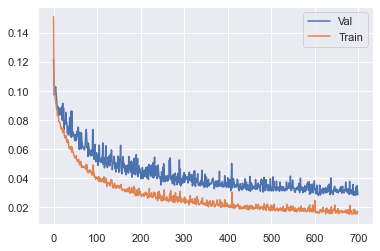

IndexError: list index out of range

In [86]:
for i in range(4):
    plt.plot(range(len(val_losses[i])), val_losses[i], label="Val")
    plt.plot(range(len(train_losses[i])), train_losses[i], label="Train")
    plt.legend()
    plt.show()
    

In [49]:
entropies = [MultiTemporal(out='output',
        temporal_type='RNN',
        conv=False,
        fusion_method='concatenate',
        single_fc=False,
        input_size= 512,
        hidden_size = 1024) for i in range(3)]

FC in: 1024 HS 1024


FC in: 1024 HS 1024


FC in: 1024 HS 1024




In [4]:
hist_ds = dataset = torch.load('../Data/WPD DS/dataset.pt')
with open('../Data/WPD DS/scaler.pkl', 'rb') as f:
    hist_scaler = pickle.load(f)

kde_ds = dataset = torch.load('../Data/WPD DS/dataset_kde.pt')
with open('../Data/WPD DS/scaler_kde.pkl', 'rb') as f:
    kde_scaler = pickle.load(f)
orig = orig_ds, orig_scaler = get_dataset(extraction_args=entropy_best)

scalers = [hist_scaler, kde_scaler, orig_scaler]
datasets = [hist_ds, kde_ds, orig_ds]


100%|█████████████████████████████████████████████████████████████████████████████| 2241/2241 [00:09<00:00, 243.56it/s]


In [5]:
orig_ds[0]['input'].shape

torch.Size([512])

In [61]:
hist_ds[0]['input'].shape

torch.Size([512])

In [13]:
import gc, torch
maes, mapes, pmapes = [], [], []
val_losses, train_losses = [], []

for i in range(3):
    train_loader, test_loader = get_split(datasets[i])
    
    model = MultiTemporal(out='output',
        temporal_type='RNN',
        conv=False,
        fusion_method='independent',
        single_fc=False,
        input_size= 512,
        hidden_size = 1024)

    train_loss, val_loss = train(train_loader, model , val_loader=test_loader, epochs=1000, LR=0.0001)
    val_losses.append(val_loss)
    train_loss.append(train_loss)
    
    mape, plosspmape, mae = test(test_loader, model, scalers[i])
    maes.append(mae)
    mapes.append(mape)
    pmapes.append(plosspmape)
    
    del model
    torch.cuda.empty_cache()
    gc.collect()

NameError: name 'datasets' is not defined

In [31]:
import numpy as np
[np.min(c) for c in [[0, 1], [0, 4]]] + [np.max(c) for c in [1,2,3]]

[0, 0, 1, 2, 3]

In [160]:
maes

[0.027634182045685834]

In [8]:
maes

[0.033061109740158606,
 0.05524993238264117,
 0.04712630911120053,
 0.0499921645326861]

In [85]:
import gc

stats_combinations = [
    ['mean', 'std', 'min-max', 'skew', 'kurtosis'],
]

# Initialize lists to store results
maes, mapes, pmapes = [], [], []
val_losses, train_losses = [], []

extraction_args = {
            "signals": None,
            "method": "stats",
            "combined": False,
            "wavelet": "db4",
            "level": 8,
            "order": "natural",
            "levels": [8],
            "normalization": False,
            "stats": None,
    
}

for stats_comb in stats_combinations:
    extraction_args['stats'] = stats_comb
    ds, scaler = get_dataset(extraction_args=extraction_args)
    
    train_loader, test_loader = get_split(ds)
    input_size = len(ds[0]['input'])

    model = MultiTemporal(
        out='output',
        conv=False,
        fusion_method='independent',
        single_fc=False,
        input_size=input_size,
        hidden_size=input_size*2,
    )

    train_loss, val_loss = train(train_loader, model, val_loader=test_loader, epochs=700, LR=0.0001)
    val_losses.append(val_loss)
    train_losses.append(train_loss)

    mape, plosspmape, mae = test(test_loader, model, scaler)
    maes.append(mae)
    mapes.append(mape)
    pmapes.append(plosspmape)

    print(f"MAE for {stats_comb}: {mae}")

    del model
    del ds
    torch.cuda.empty_cache()
    gc.collect()


100%|█████████████████████████████████████████████████████████████████████████████| 2241/2241 [00:10<00:00, 205.37it/s]


FC in: 12288 HS 6144 <class 'int'>


Using: cuda


100%|███████████████████| 113/113 [00:04<00:00, 27.70batch/s, counter=0, epoch=68/700, lastLoss=0.0483, valLoss=0.0633]


100%|██████████████████| 113/113 [00:04<00:00, 27.72batch/s, counter=0, epoch=136/700, lastLoss=0.0389, valLoss=0.0544]


100%|██████████████████| 113/113 [00:03<00:00, 28.46batch/s, counter=0, epoch=204/700, lastLoss=0.0274, valLoss=0.0437]


100%|███████████████████| 113/113 [00:03<00:00, 28.92batch/s, counter=0, epoch=272/700, lastLoss=0.0244, valLoss=0.039]


100%|██████████████████| 113/113 [00:03<00:00, 29.12batch/s, counter=0, epoch=340/700, lastLoss=0.0228, valLoss=0.0381]


100%|███████████████████| 113/113 [00:03<00:00, 28.77batch/s, counter=0, epoch=408/700, lastLoss=0.0216, valLoss=0.037]


100%|██████████████████| 113/113 [00:03<00:00, 28.55batch/s, counter=0, epoch=476/700, lastLoss=0.0191, valLoss=0.0353]


100%|██████████████████| 113/113 [00:03<00:00, 29.23batch/s, counter=0, epoch=544/700, lastLoss=0.0175, valLoss=0.0332]


100%|██████████████████| 113/113 [00:03<00:00, 28.58batch/s, counter=0, epoch=612/700, lastLoss=0.0168, valLoss=0.0291]


100%|██████████████████| 113/113 [00:03<00:00, 28.72batch/s, counter=0, epoch=680/700, lastLoss=0.0159, valLoss=0.0319]


100%|██████████████████| 113/113 [00:03<00:00, 28.94batch/s, counter=0, epoch=700/700, lastLoss=0.0167, valLoss=0.0313]


Average train loss: 0.028640822118393104
Average validation loss: 0.04323706875750199
MAE for ['mean', 'std', 'min-max', 'skew', 'kurtosis']: 0.027634182045685834


In [166]:
def plot_parameter_bars(df, fname=None, max_y=10):
    fig, ax = plt.subplots(1, 1, figsize=(20, 10), constrained_layout=True)
    df.plot.bar(ax=ax, x='Architecture')
    
    ax.xaxis.set_tick_params(labelsize=25)
    ax.yaxis.set_tick_params(labelsize=25)
    ax.set_ylabel("MAPE", fontsize=30)
    ax.set_xlabel("Processing Method", fontsize=30)
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),  prop={'size': 25})
    #ax.set_title("Average percent correctness 100-MAPE", size=40, y=1.08)
    ax.set_ylim(0, max_y)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tick_params(axis='both', labelsize=25)

    fig.savefig(f"../Results/Figures/{fname}.png", bbox_inches='tight')


In [170]:
#all_vals = np.array([upDown_p, downUp_p, down_p, down_p])
#all_vals = np.array([[str(val)+"%" for val in vals] for vals in all_vals])

import pandas as pd
import numpy as np
pmapes = np.array(pmapes)
df = pd.DataFrame({
    "Architecture": ["Combined stats", "Entropy", "Min-max", "Raw", "Energy"],
    "YM (Cutis)": pmapes[:, 0],
    "YM (Hypodermis": pmapes[:, 1],
    "PR (Cutis)": pmapes[:, 2],
    "PR (Hypodermis)": pmapes[:, 3],
    "Perm (Cutis)": pmapes[:, 4],
    "Perm (Hypodermis)": pmapes[:, 5],
    "Overall MAPE": maes
})





In [171]:
df.max().values[1:].max()

18.389132

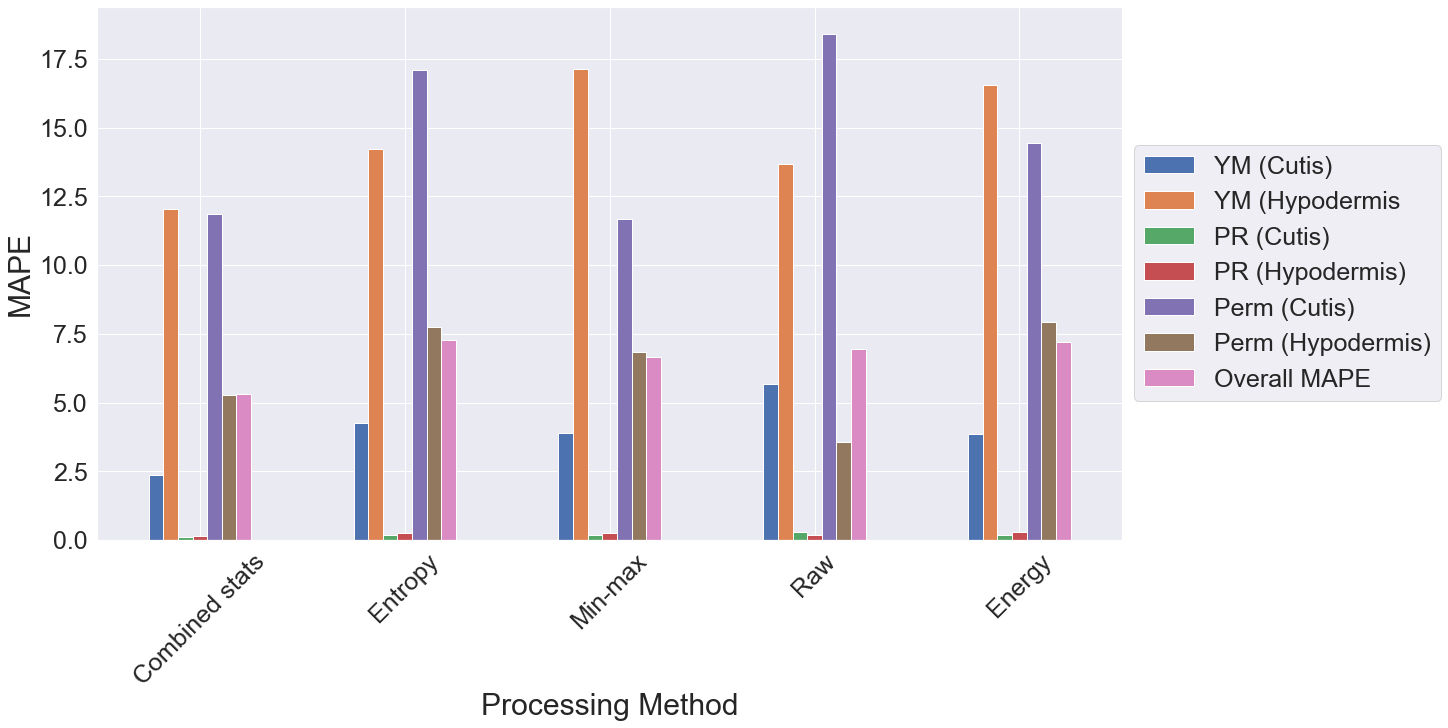

In [172]:
import seaborn as sns
sns.set_theme()
plot_parameter_bars(df, max_y=df.max().values[1:].max()+1, fname='WPD_proc')

In [88]:
from torchsummary import summary

In [155]:
model = MultiTemporal(out='output',
                          conv=False,
                          fusion_method='independent',
                          single_fc=True,
                          input_size=2048,
                          hidden_size=4096,
                          ).cuda()


FC in: 8192 HS 4096 <class 'int'>


In [156]:
summary(model, (1, 2048))

torch.Size([2, 1, 2048])
torch.Size([2, 1, 2048])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
               RNN-1  [[-1, 1, 4096], [-1, 2, 4096]]               0
               RNN-2  [[-1, 1, 4096], [-1, 2, 4096]]               0
            Linear-3                    [-1, 6]          49,158
Total params: 49,158
Trainable params: 49,158
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 512.00
Params size (MB): 0.19
Estimated Total Size (MB): 512.20
----------------------------------------------------------------


In [ ]:
from copy import deepcopy
model = MultiTemporal(out='output',
                          single_fc=True,
                          input_size=15,
                          hidden_size=128,
                          ).cuda()

In [ ]:
summary(model, (2, 128), batch_size=32)

In [124]:
best_CNN =nn.Sequential(
    nn.Conv1d(2, 128, kernel_size=5, padding=1, bias=False),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    nn.MaxPool1d(kernel_size=5, stride=2),

    nn.Conv1d(128, 256, kernel_size=3, padding=1, bias=False),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.MaxPool1d(kernel_size=2, stride=2),

    nn.Conv1d(256, 512, kernel_size=3, padding=1, bias=False),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    nn.MaxPool1d(kernel_size=2, stride=2),
)

100%|██████████████████████████████████████████████████████████████████████████████| 2241/2241 [00:37<00:00, 59.45it/s]


torch.Size([2048])